2022-12-01 15:47:33.635 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/3 (16.355 ms elapsed) --------------------
2022-12-01 15:47:33.636 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 1/5: Discharge at C/5 for 10 hours or until 3.3 V
2022-12-01 15:47:34.161 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 2/5: Rest for 1 hour
2022-12-01 15:47:34.335 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 3/5: Charge at 1 A until 4.1 V
2022-12-01 15:47:34.742 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 4/5: Hold at 4.1 V until 10 mA
2022-12-01 15:47:35.327 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 5/5: Rest for 1 hour
2022-12-01 15:47:35.621 - [NOTICE] callbacks.on_cycle_start(174): Cycle 2/3 (2.003 s elapsed) --------------------
2022-12-01 15:47:35.622 - [NOTICE] callbacks.on_step_start(182): Cycle 2/3, step 1/5: Discharge at C/5 for 10 hours or until 3.3 V
2022-12-01 15:47:36.034 - [NOTICE] callbacks.on_step_start(182): Cycle 2/3, st

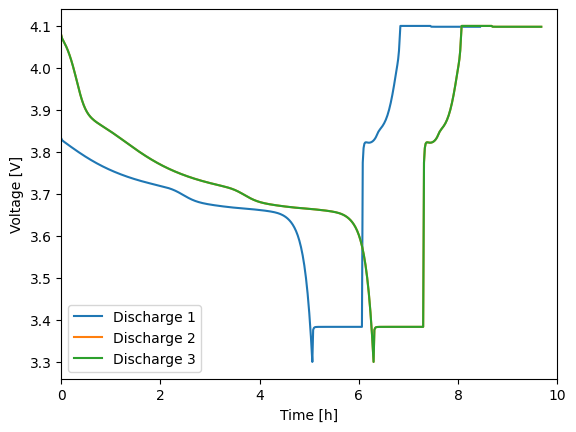

interactive(children=(FloatSlider(value=0.0, description='t', max=27.797331939179788, step=0.27797331939179787…

In [3]:
# GITT tests
# Constant-current constant-voltage charge
#
import pybamm
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/5 for 10 hours or until 3.3 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 10 mA",
            "Rest for 1 hour",
        ),
    ]
    * 3
)
model = pybamm.lithium_ion.DFN()

sim = pybamm.Simulation(
    model, experiment=experiment, solver=pybamm.CasadiSolver("fast with events")
)
sim.solve()

# Plot voltages from the discharge segments only
fig, ax = plt.subplots()
for i in range(3):
    # Extract sub solutions
    sol = sim.solution.cycles[i]
    # Extract variables
    t = sol["Time [h]"].entries
    V = sol["Terminal voltage [V]"].entries
    # Plot
    ax.plot(t - t[0], V, label="Discharge {}".format(i + 1))
    ax.set_xlabel("Time [h]")
    ax.set_ylabel("Voltage [V]")
    ax.set_xlim([0, 10])
ax.legend(loc="lower left")

# Save time, voltage, current, discharge capacity, temperature, and electrolyte
# concentration to csv and matlab formats
sim.solution.save_data(
    "output.mat",
    [
        "Time [h]",
        "Current [A]",
        "Terminal voltage [V]",
        "Discharge capacity [A.h]",
        "X-averaged cell temperature [K]",
        "Electrolyte concentration [mol.m-3]",
    ],
    to_format="matlab",
    short_names={
        "Time [h]": "t",
        "Current [A]": "I",
        "Terminal voltage [V]": "V",
        "Discharge capacity [A.h]": "Q",
        "X-averaged cell temperature [K]": "T",
        "Electrolyte concentration [mol.m-3]": "c_e",
    },
)
# We can only save 0D variables to csv
sim.solution.save_data(
    "output.csv",
    [
        "Time [h]",
        "Current [A]",
        "Terminal voltage [V]",
        "Discharge capacity [A.h]",
        "X-averaged cell temperature [K]",
    ],
    to_format="csv",
)

# Show all plots
sim.plot()
